# Experiments from Welling et al. paper.

"Bayesian Learning via Stochastic Gradient Langevin Dynamics"
---
** Simple Demonstration **

$\theta_1 \sim N(0,\sigma_{1}^2)$ ; $\theta_2 \sim N(0,\sigma_{2}^2)$ <br>
$x_i \sim \frac{1}{2}N(\theta_1,\sigma_{x}^2) + \frac{1}{2}N(\theta_1 + \theta_2,\sigma_{x}^2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# import scipy.stats as stat

In [2]:
# Some parameters
data_size = 10000
var1 = 10; var2 = 1; varx = 2

theta = np.linspace(-3,3,1000)

theta1=0; theta2=1

N1 = norm(theta1,np.sqrt(varx)) 
N2 = norm(theta1+theta2,np.sqrt(varx))
likelihood = 0.5*N1.pdf(theta)+ 0.5*N2.pdf(theta)

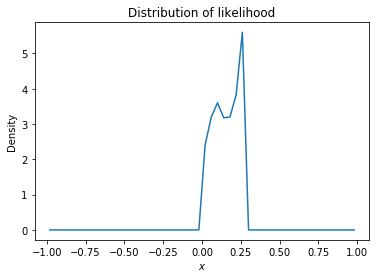

In [3]:
# likelihood plot
histogram,bins = np.histogram(likelihood,bins=50,range=[-1,1], density=True)
midx = (bins[0:-1]+bins[1:])/2

plt.plot(midx,histogram)

plt.title('Distribution of likelihood')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.show()


In [8]:
theta1 = 0
theta2 = 1
varx=2

# posterior equation
post = np.exp(-(theta)**2/(2*var1))* np.exp(-(theta)**2/(2*var2)) * \
(0.5*np.exp(-(theta-theta1)**2/(2*varx))+0.5*np.exp(-(theta-(theta1+theta2))**2/(2*varx)))

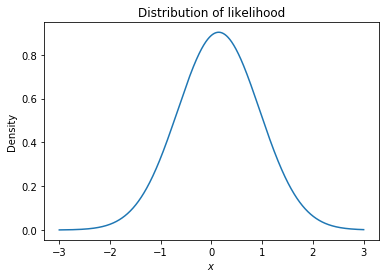

In [9]:
# Posterior plot
histogram,bins = np.histogram(post,bins=50,range=[-2,2], density=False)
midx = (bins[0:-1]+bins[1:])/2

plt.plot(theta,post)

plt.title('Distribution of likelihood')
plt.xlabel('$x$')
plt.ylabel('Density')
plt.show()

In [105]:
X,Y=np.meshgrid(theta,theta)


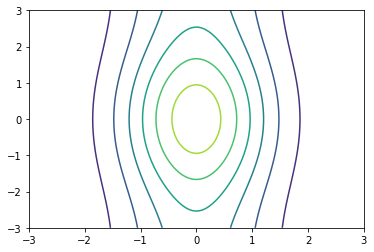

In [106]:
plt.contour(X,Y,Z)
plt.show()

#### Implementation of Stochatic Gradient Descent
I am applying the stochastic gradient descent based on this article:
https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/

In [28]:
def sigmoid_activation(x):
    '''compute and return the sigmoid activation value for a
    given input value'''
    return 1.0 / (1 + np.exp(-x))
 
def next_batch(X, y, batchSize):
    '''loop over our dataset `X` in mini-batches of size `batchSize`
    with labels (classification) y'''
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])
    

In [ ]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
    # initialize the total loss for the epoch
    epochLoss = []
 
    # loop over our data in batches
    for (batchX, batchY) in next_batch(X, y, args["batch_size"]):
        # take the dot product between our current batch of
        # features and weight matrix `W`, then pass this value
        # through the sigmoid activation function
        preds = sigmoid_activation(batchX.dot(W))
 
        # now that we have our predictions, we need to determine
        # our `error`, which is the difference between our predictions
        # and the true values
        error = preds - batchY
 
        # given our `error`, we can compute the total loss value on
        # the batch as the sum of squared loss
        loss = np.sum(error ** 2)
        epochLoss.append(loss)
 
        # the gradient update is therefore the dot product between
        # the transpose of our current batch and the error on the
        # # batch
        gradient = batchX.T.dot(error) / batchX.shape[0]
 
        # use the gradient computed on the current batch to take
        # a "step" in the correct direction
        W += -args["alpha"] * gradient
 
    # update our loss history list by taking the average loss
    # across all batches
    lossHistory.append(np.average(epochLoss))